Text(0.5, 1.0, 'BATHYMETRY (South Agola Cost)')

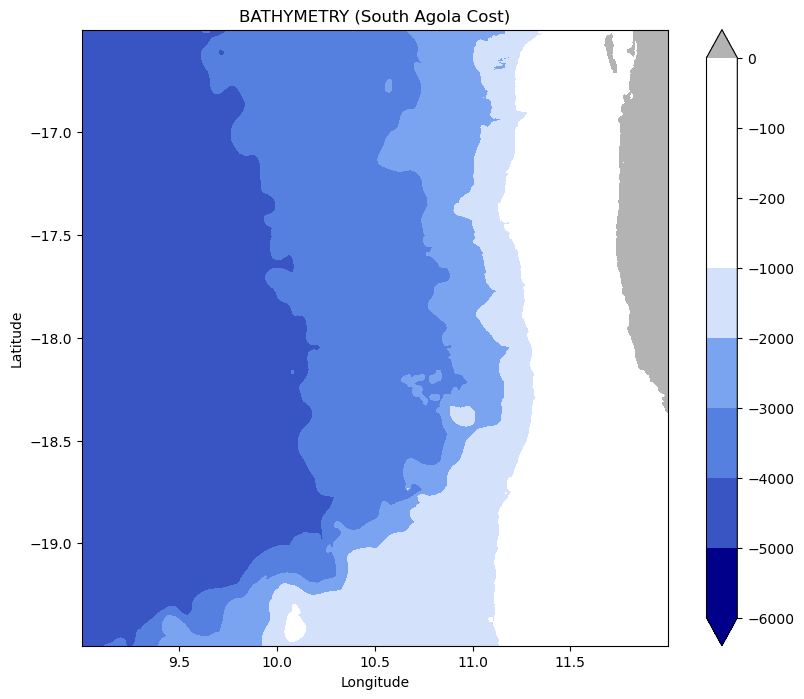

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as spio
import matplotlib
ds = xr.open_dataset("C:\python\GEBCO\gebco.nc", engine="netcdf4")
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
blon = ds['lon']
blat = ds['lat']
bdepth = ds['elevation']
Blon,Blat = np.meshgrid(blon,blat)
blevels = [-6000, -5000, -4000, -3000, -2000, -1000, -200, -100, 0]
N = len(blevels)-1
cmap2 = custom_div_cmap(N, mincol='DarkBlue', midcol='CornflowerBlue' ,maxcol='w')
cmap2.set_over('0.7') # set positive values (land) as light gray
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_aspect(1/np.cos(np.average(blat)*np.pi/180)) # set the aspect ratio for a local cartesian grid
pc = plt.contourf(Blon,Blat,bdepth, vmin=-6000, vmax=0, levels=blevels, cmap=cmap2, extend='both')
plt.colorbar(pc, ticks=blevels, spacing='uniform') 
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("BATHYMETRY (South Agola Cost)", color="black")